## 중간고사 대체 과제
-  [OpenML](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) is a public repository for machine learning datasets and experiments
- 'recall_macro"를 최대화 하는 모델을 개발하고 제시하라
- mage.ai ETL 파이프라인으로 구성하여 제시하라

### **[OpenML에서 데이터 현황 읽기](https://www.openml.org/search?type=data&status=active&id=44234)**
- google에서 "openml" search하고 openml에서 "Bank_marketing_data_set_UCI"을 찾아 클릭하여 데이터 현황 읽기

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("Bank_marketing_data_set_UCI", return_X_y= True)
print(X.shape)
print(y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(45211, 16)
(45211,)


In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [ ]:
df = pd.merge(X, y,
              left_index=True, right_index=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<ipython-input-11-21de47f5df41>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='age', y='marital', inner='box', palette='Dark2')


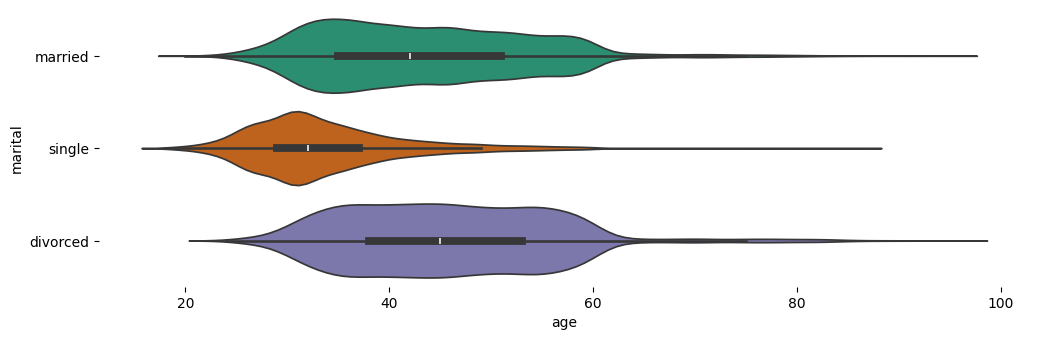

In [ ]:
# @title marital vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['marital'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='marital', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# 전체 데이터 현황 보기
import pandas as pd

def eda(df):
    print("데이터를 한 눈에 보기")
    return pd.DataFrame({'자료 내용(contents)':{col:df[col].unique() for col in df},
                '데이터형태(dtypes)':{col:df[col].dtype for col in df},
                '고유값 수(nunique)':{col:len(df[col].unique()) for col in df},
                '결측치 비율(%)':{col:str(round(sum(df[col].isna())/len(df),2))+'%' for col in df},
                '중복건수':{col:sum(df[col].duplicated()) for col in df},
                'nan 비율':{col:int(df[df[col] == 'nan'].shape[0]/len(df)*100) for col in df}
                })

In [ ]:
eda(df)

데이터를 한 눈에 보기


,자료 내용(contents),데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,nan 비율
age,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...",int64,77,0.0%,45134,0
job,"[management, technician, entrepreneur, blue-co...",object,12,0.0%,45199,0
marital,"[married, single, divorced]",object,3,0.0%,45208,0
education,"[tertiary, secondary, unknown, primary]",object,4,0.0%,45207,0
default,"[no, yes]",object,2,0.0%,45209,0
balance,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...",int64,7168,0.0%,38043,0
housing,"[yes, no]",object,2,0.0%,45209,0
loan,"[no, yes]",object,2,0.0%,45209,0
contact,"[unknown, cellular, telephone]",object,3,0.0%,45208,0
day,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",int64,31,0.0%,45180,0



#### 특성변수 x(독립변수)는 아래와 같을 것임
1.   age: 고객의 나이 (예: 58, 44, 33 등)
2.   job: 고객의 직업 분류 (예: management, technician, entrepreneur 등)
3.   marital: 결혼 상태 (예: married, single)
4.   education: 교육 수준 (예: tertiary, secondary, unknown)
5.   default: 기본 대출 여부 (yes 또는 no)
6.   balance: 은행 계좌 잔액
7.   housing: 주택 대출 여부 (yes 또는 no)
8.   loan: 개인 대출 여부 (yes 또는 no)
9.   contact: 마지막 접촉 유형
10.  day: 마지막 접촉이 이루어진 달의 날짜
11. month: 마지막 접촉이 이루어진 달
12. duration: 마지막 접촉의 지속 시간 (초 단위)
13. campaign: 이번 캠페인 동안 고객에게 접촉한 횟수
14. pdays: 이전 캠페인 이후 지난 일수, -1은 고객이 이전에 접촉되지 않았음을 의미함
15. previous: 이번 캠페인 이전에 고객과 접촉한 횟수
16. poutcome: 이전 캠페인의 결과

#### target y(종속변수)는 특정 캠페인의 성공 여부를 나타내며, 'yes'는 성공을, 'no'는 실패로 판단됨

In [ ]:
for n numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# numeric과 categorical 정의
categorical_columns = list(df.columns[(df.dtypes == 'object') | (df.dtypes == 'category')])
categorical_columns.remove('y')
numeric_columns = list(df.columns[~((df.dtypes == 'object') | (df.dtypes == 'category'))])

print(categorical_columns)
print(numeric_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## **EDA(Explanatory Data Analysis)**
### **1. 수치형변수(Numerical Variables)**
- **시각화는 히스토그램, 상자 그림(박스 플롯), 바이올린 플롯(메모리 많이 사용) 등**
- **통계적해석은 상관관계 혹은 산점도**

In [ ]:
# Define a function to visualize multiple numeric variables
def visualize_numeric_variables(dataframe, numeric_columns):
    """
    This function takes a dataframe and a list of numeric column names,
    and it generates a histogram and a boxplot for each numeric variable.

    Parameters:
    - dataframe: pandas DataFrame containing the data
    - numeric_columns: list of column names to visualize

    Returns:
    - This function does not return anything. It shows the plots.
    """

    # Set up the matplotlib figure
    number_of_columns = len(numeric_columns)
    fig, axes = plt.subplots(number_of_columns, 2, figsize=(15, 4 * number_of_columns))

    # Iterate over the list of numeric columns to create visualizations
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE for each numeric column
        sns.histplot(data=dataframe, x=col, ax=axes[i, 0], kde=True)
        axes[i, 0].set_title(f'Histogram of {col}')

        # Boxplot for each numeric column
        sns.boxplot(x=dataframe[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Code to call the function, uncomment it when the dataframe and column names are available
# Example usage: visualize_numeric_variables(df, ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

# Please note: The code execution in this environment has been commented out
# as the actual DataFrame is not present. You would need to uncomment and run
# this in your local environment where you have your data loaded in `df` DataFrame.


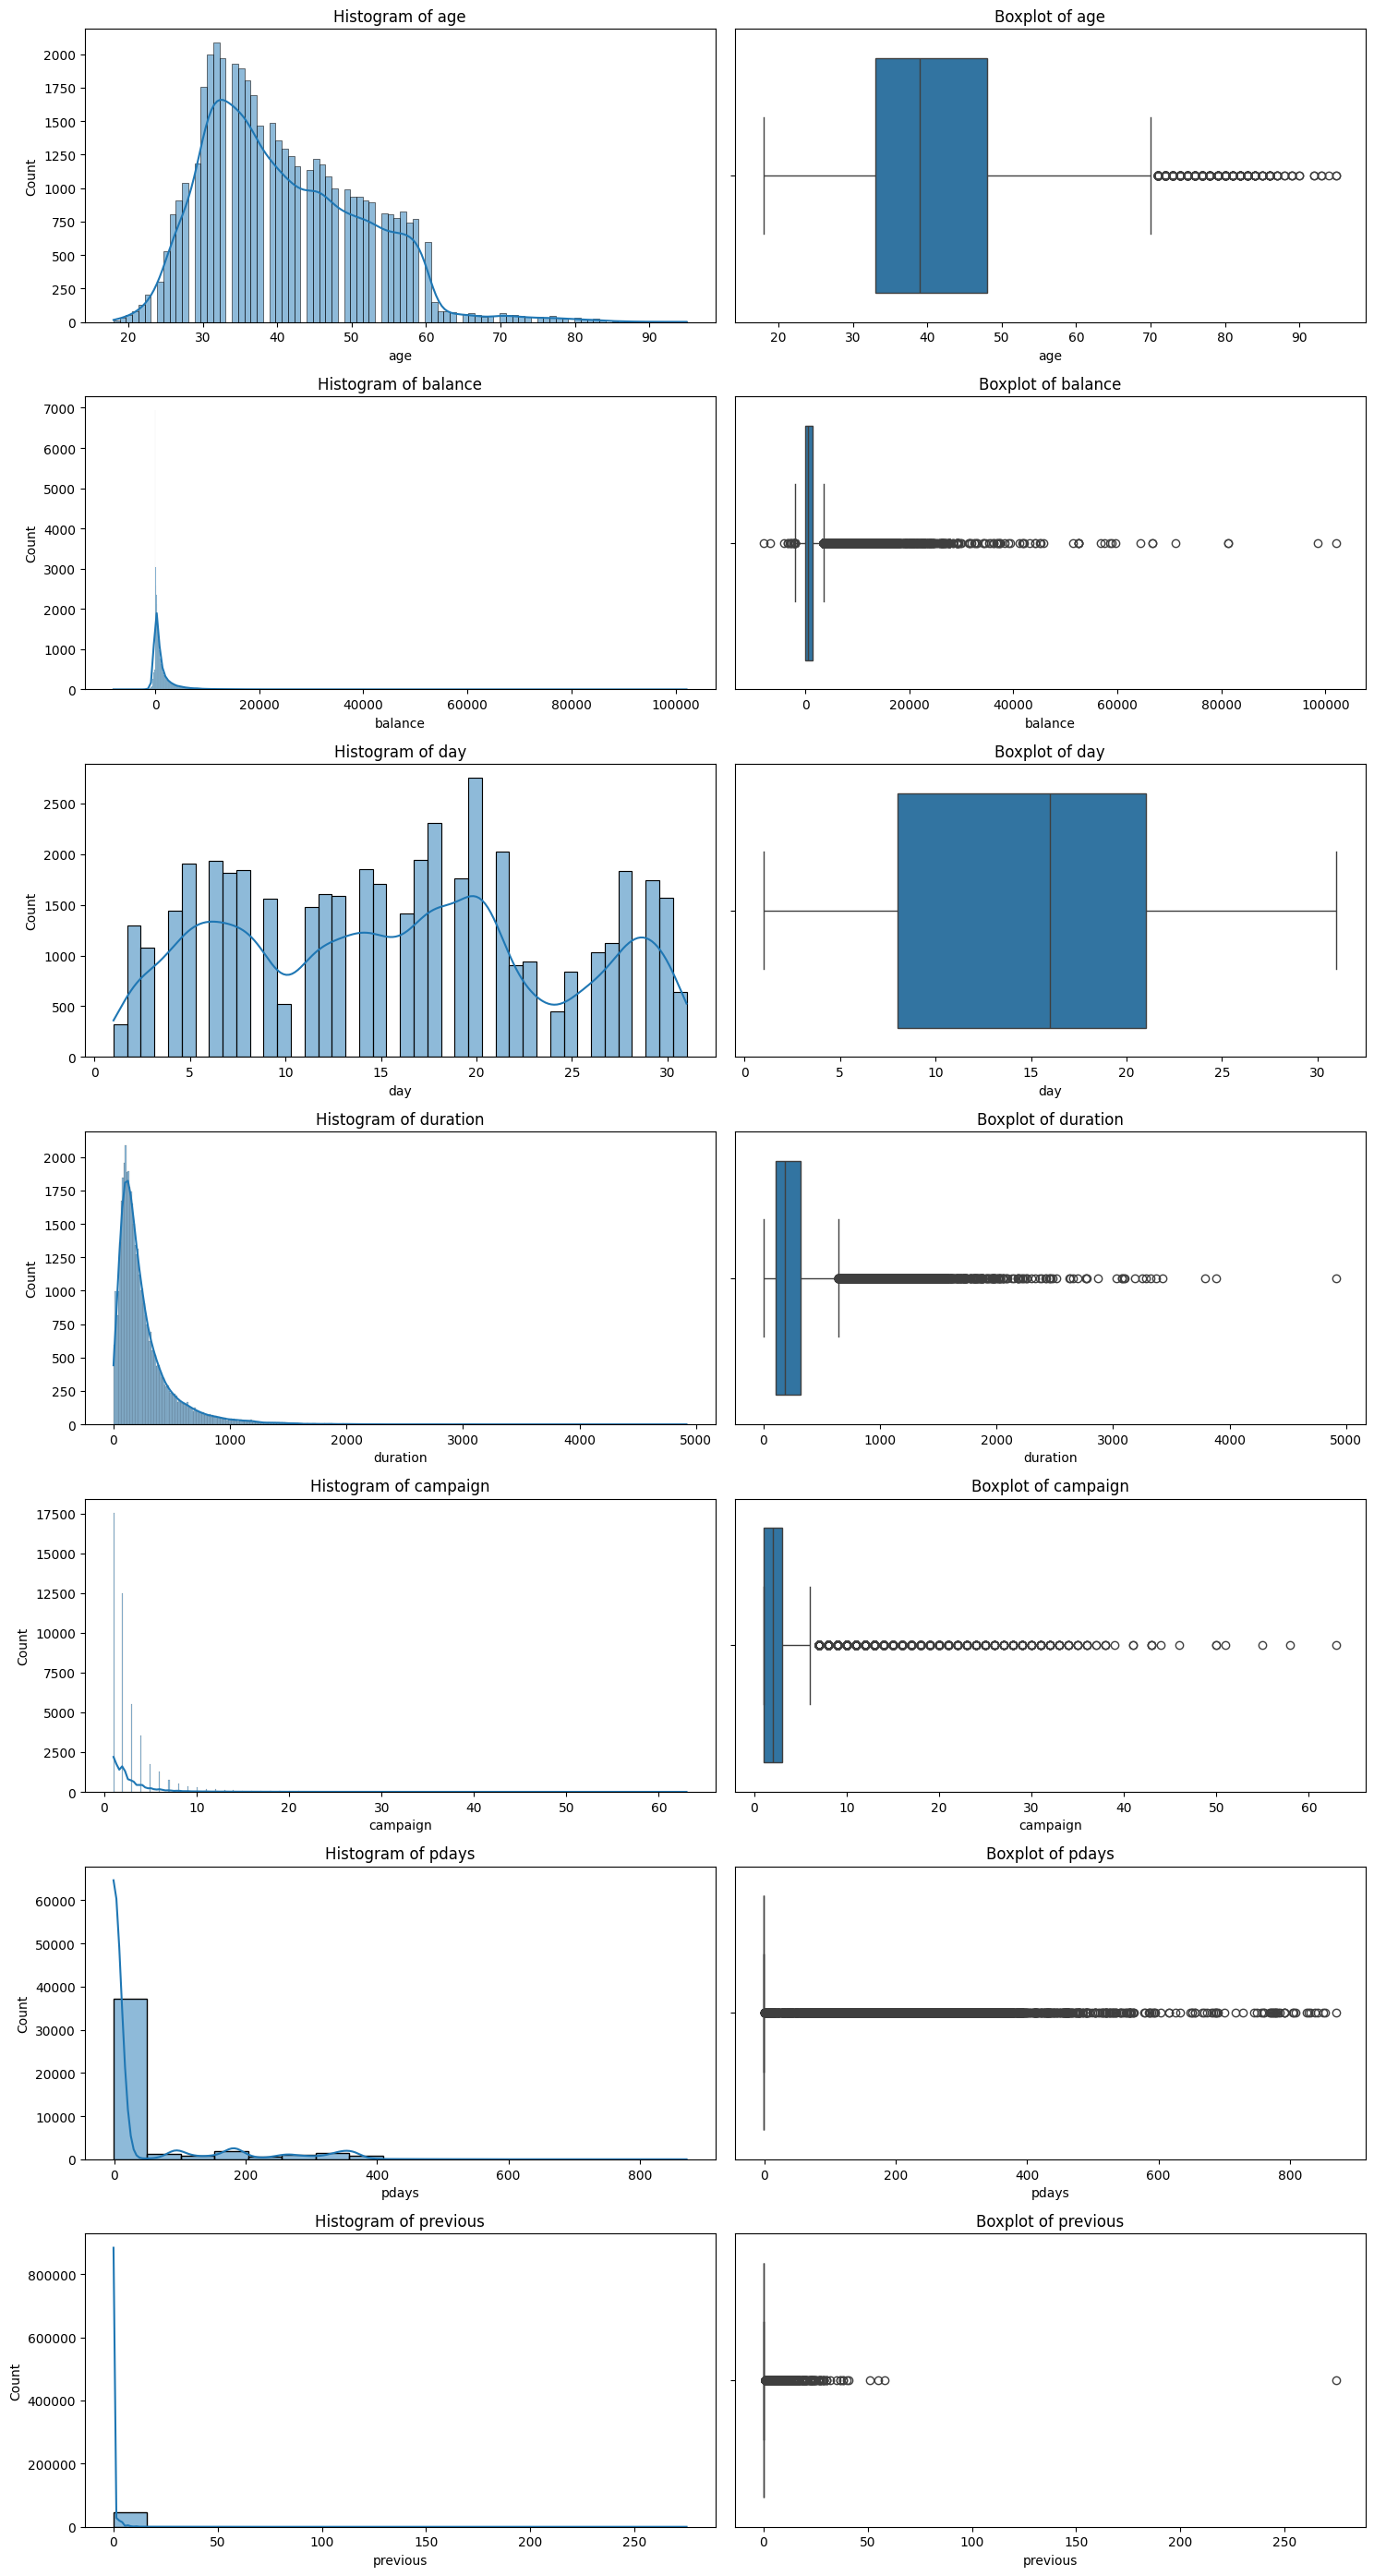

In [ ]:
visualize_numeric_variables(df, numeric_columns)

In [ ]:
df[numeric_columns].describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [ ]:
eda(df[numeric_columns])

데이터를 한 눈에 보기


,자료 내용(contents),데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,nan 비율
age,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...",int64,77,0.0%,45134,0
balance,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...",int64,7168,0.0%,38043,0
day,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",int64,31,0.0%,45180,0
duration,"[261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...",int64,1573,0.0%,43638,0
campaign,"[1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...",int64,48,0.0%,45163,0
pdays,"[-1, 151, 166, 91, 86, 143, 147, 89, 140, 176,...",int64,559,0.0%,44652,0
previous,"[0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9...",int64,41,0.0%,45170,0


**[Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)**

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_all_scaling_001.png'>

### **2. 범주형변수(Categoricla Variables)**
- **카운트 플롯(count plot), 바 플롯(bar plot), 박스 플롯(box plot), 바이올린 플롯(violin plot)**

In [ ]:
def visualize_categorical_variables(dataframe, categorical_columns):
    number_of_columns = len(categorical_columns)
    # When there's only one column, we just have one axis, not a 2D array of axes.
    single_column = number_of_columns == 1
    fig, axes = plt.subplots(nrows=number_of_columns, ncols=2, figsize=(15, 4 * number_of_columns))
    axes = axes.flatten() if not single_column else [axes]

    for i, col in enumerate(categorical_columns):
        ax = axes[i*2] if not single_column else axes[0]
        sns.countplot(x=col, data=dataframe, ax=ax)
        ax.set_title(f'Count Plot of {col}')
        ax.tick_params(axis='x', rotation=90)

        # For the pie chart, we use a different layout if it's just one column
        ax_pie = axes[i*2+1] if not single_column else axes[1]
        dataframe[col].value_counts().plot(kind='pie', ax=ax_pie, autopct='%1.1f%%')
        ax_pie.set_title(f'Pie Chart of {col}')
        ax_pie.set_ylabel('')  # Hide the y-label

    plt.tight_layout()
    plt.show()

In [ ]:
print(df.shape)
print(df.sample(frac=0.1).shape)

(45211, 17)
(4521, 17)


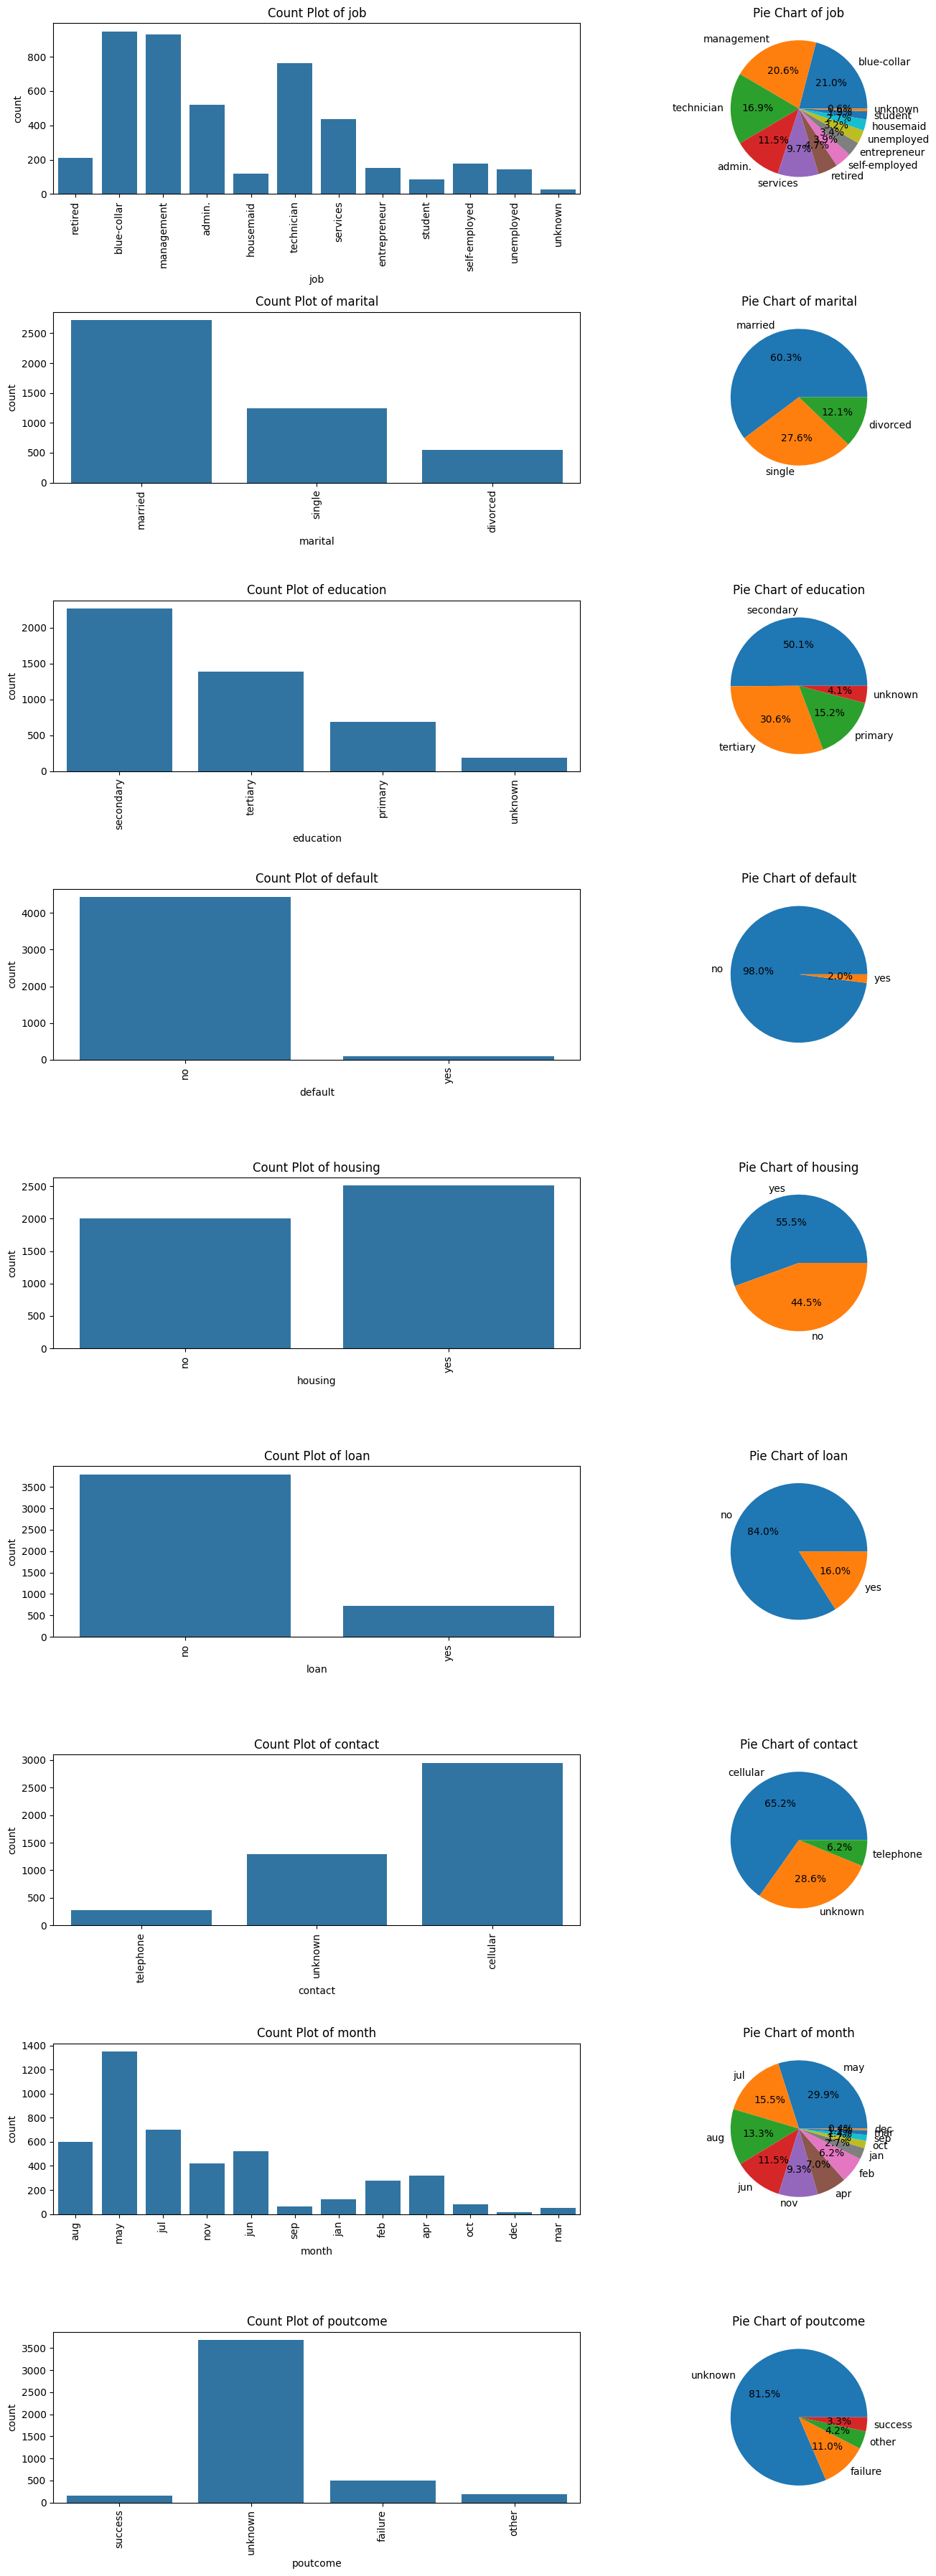

In [ ]:
visualize_categorical_variables(df.sample(frac=0.1), categorical_columns)

### **3. 범주형과 실수형 변수(Numerical and Categoricla Variables)**
- **??**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_numeric_by_category(dataframe, categorical_column, numeric_column):
    """
    This function takes a dataframe, a categorical column name, and a numeric column name,
    and generates a boxplot and violinplot side by side for the numeric data grouped by the categorical data.

    Parameters:
    - dataframe: pandas DataFrame containing the data.
    - categorical_column: the name of the categorical column to group by.
    - numeric_column: the name of the numeric column to visualize.

    Returns:
    - This function does not return anything. It shows the plots.
    """

    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    # Boxplot for the numeric column grouped by the categorical column
    sns.boxplot(x=categorical_column, y=numeric_column, data=dataframe, ax=axes[0])
    axes[0].set_title(f'Boxplot of {numeric_column} by {categorical_column}')
    axes[0].tick_params(axis='x', rotation=45)

    # Violinplot for the numeric column grouped by the categorical column
    sns.violinplot(x=categorical_column, y=numeric_column, data=dataframe, ax=axes[1])
    axes[1].set_title(f'Violinplot of {numeric_column} by {categorical_column}')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_numeric_by_category(df, 'marital', 'balance')


In [ ]:
# Assuming 'df' is your DataFrame, 'categorical_columns' is a list of categorical column names,
# and 'numeric_columns' is a list of numeric column names:
from tqdm import tqdm

for categorical_col in tqdm(categorical_columns):
    for numeric_col in tqdm(numeric_columns):
        visualize_numeric_by_category(df.sample(frac=0.2), categorical_col, numeric_col)


Output hidden; open in https://colab.research.google.com to view.

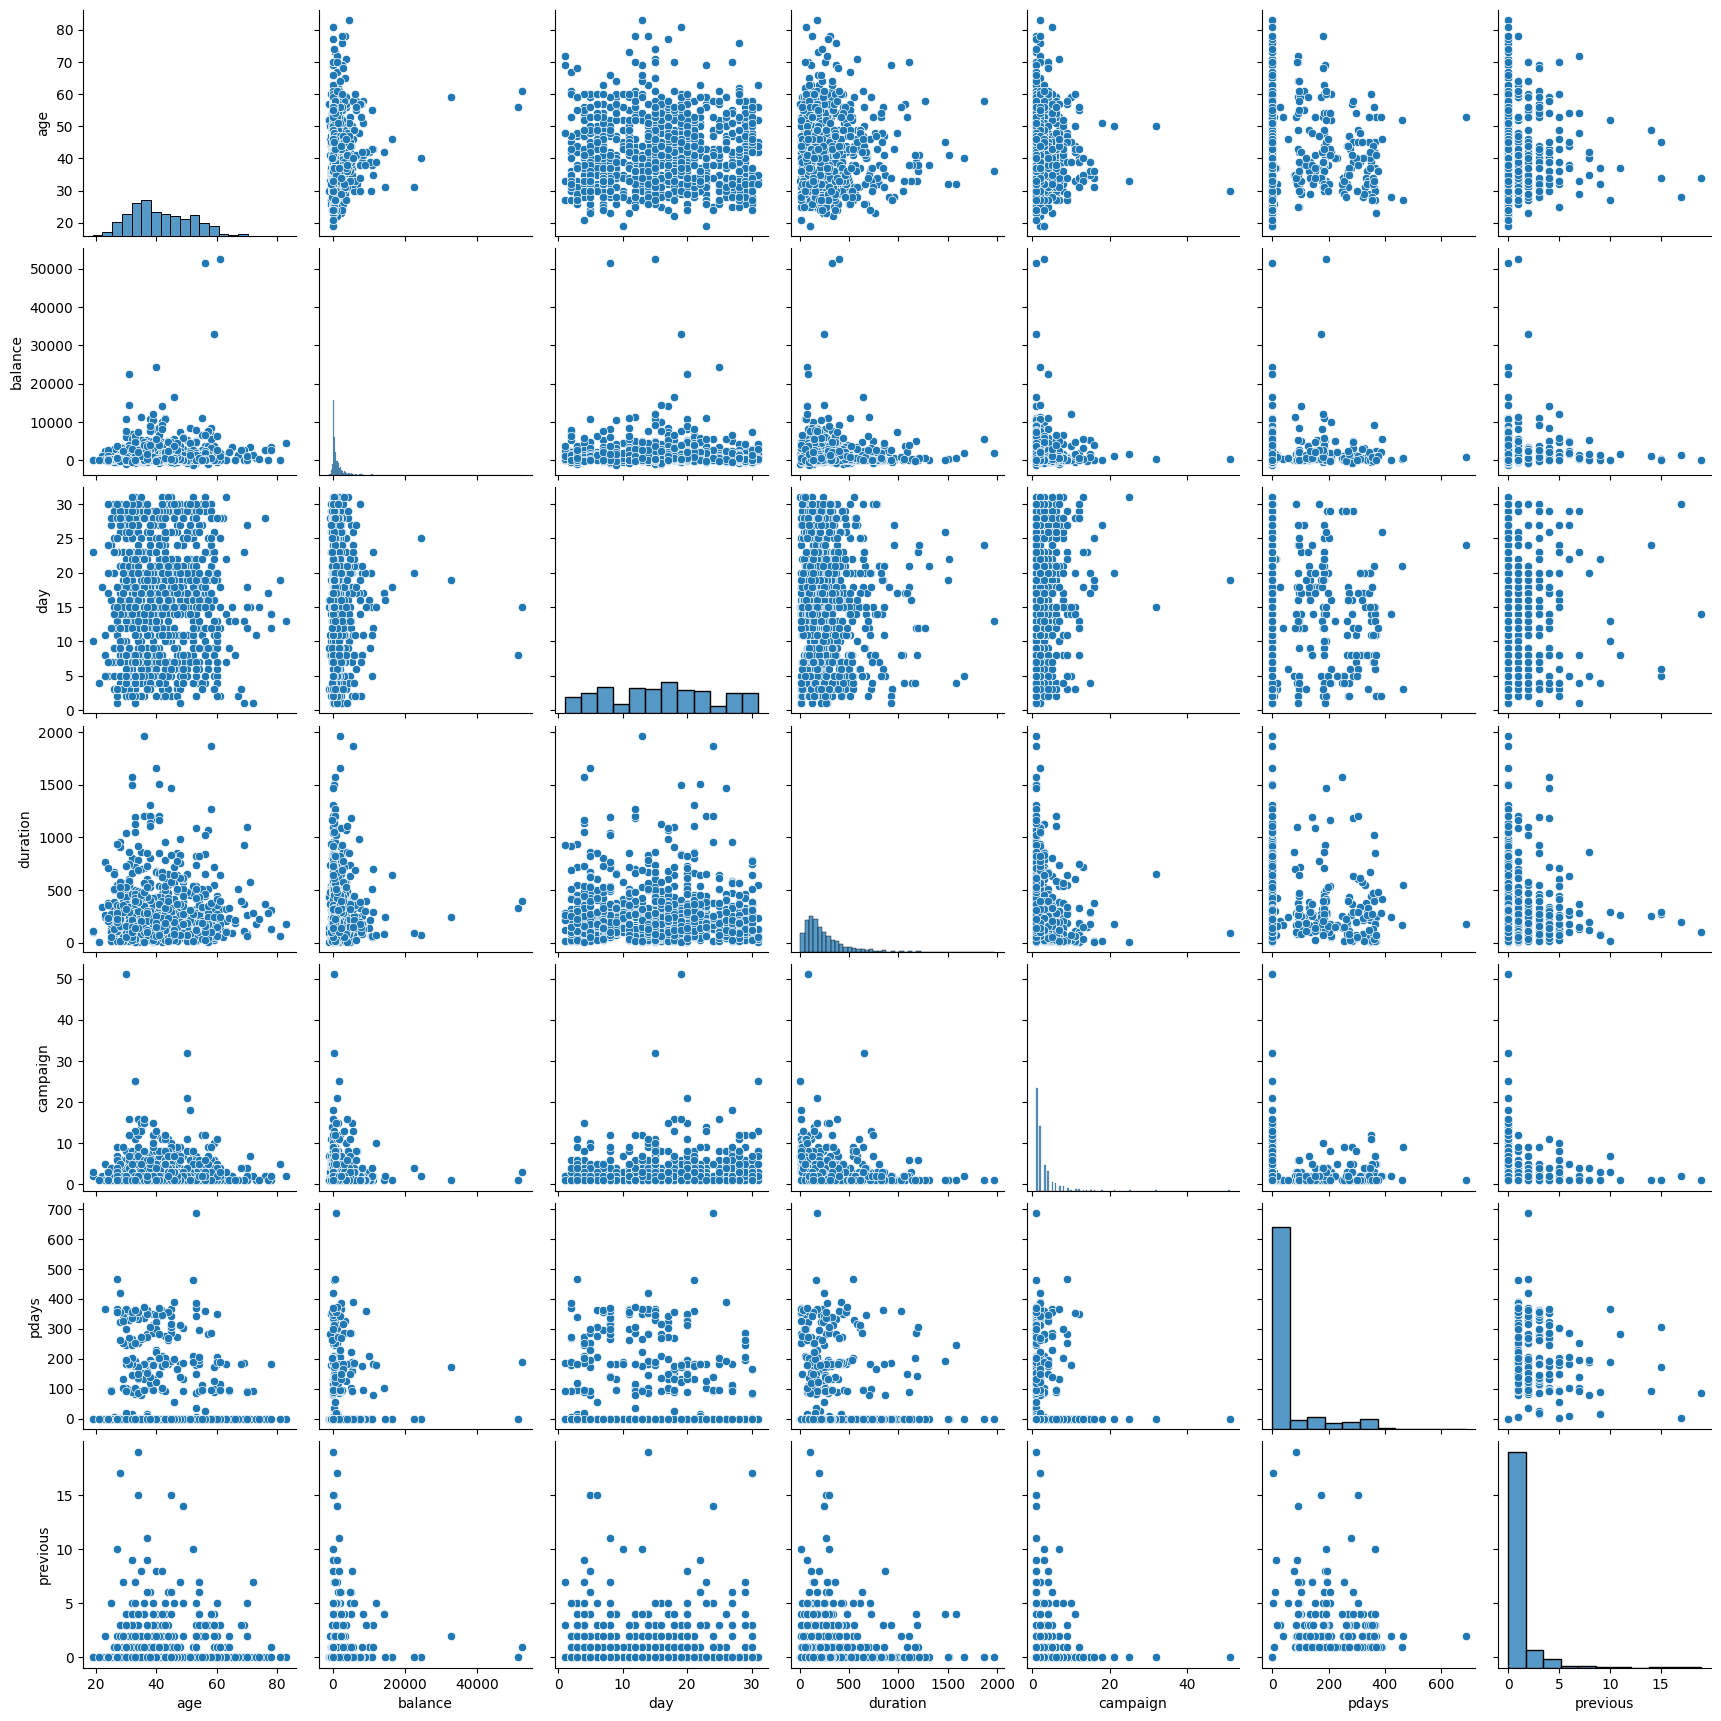

In [ ]:
sns.pairplot(df.sample(1000))

### **<font color ='red'> 이상치, 결측치 등의 처리 필요**
- **이상치와 결측치는 연구자가 판단하여 의사결정한다.**
- [제 4장 참고](https://github.com/ancestor9/beat-master/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0.pdf)

### **1. Data split**

<img src='https://help.qlik.com/ko-KR/cloud-services/Subsystems/Hub/Content/Resources/Images/AutomatedMachineLearning/holdout-crossvalidation.png' width=800 height =400>

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

X = y = np.arange(20)
rng = np.random.RandomState(0)
cv = KFold(n_splits=5,
           shuffle=True, random_state=rng)

In [ ]:
def data_split_view(X, y):
    print('data split to learn or fit by machine / Hold out')
    fold = 0
    for train, test in cv.split(X, y):
        print(f'{fold+1} fold: data split', end=':  ')
        print(X[train], X[test])
        fold += 1

In [ ]:
# random_state=rng 에 따라 달라진다.
data_split_view(X, y)

data split to learn or fit by machine / Hold out
1 fold: data split:  [ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17] [ 1  8 18 19]
2 fold: data split:  [ 0  1  2  3  4  5  7  8  9 11 12 14 15 16 18 19] [ 6 10 13 17]
3 fold: data split:  [ 0  1  3  6  7  8  9 10 11 12 13 15 16 17 18 19] [ 2  4  5 14]
4 fold: data split:  [ 0  1  2  3  4  5  6  8 10 12 13 14 15 17 18 19] [ 7  9 11 16]
5 fold: data split:  [ 1  2  4  5  6  7  8  9 10 11 13 14 16 17 18 19] [ 0  3 12 15]


<img src ='https://velog.velcdn.com/images/rjtp5670/post/42d1fa6f-de36-479e-95cd-0f1df540259f/image.png'>

<img src= 'https://miro.medium.com/v2/resize:fit:1400/1*-NC7sX7kzjJ_UKfUNYbh6Q.png'>

In [ ]:
# Hold out data to test by model whichi is trained or fitted or learned by train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)
data_split_view(X_train, y_train)

data split to learn or fit by machine / Hold out
1 fold: data split:  [ 5 11 18 16 13  2  9 19  4 12  7 14] [ 3 10  6]
2 fold: data split:  [11  3 16 13  2  9 19 12  7 10 14  6] [ 5 18  4]
3 fold: data split:  [ 5 11  3 18 13  2  9 19  4 10 14  6] [16 12  7]
4 fold: data split:  [ 5  3 18 16  2  9  4 12  7 10 14  6] [11 13 19]
5 fold: data split:  [ 5 11  3 18 16 13 19  4 12  7 10  6] [ 2  9 14]


In [ ]:
X_test, y_test

(array([ 0, 17, 15,  1,  8]), array([ 0, 17, 15,  1,  8]))

## **데이터전처리(Data Preprocessing) 주의할 점!**

<img src ='https://images.unsplash.com/photo-1506702315536-dd8b83e2dcf9?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8bWlzdGFrZXN8ZW58MHx8MHx8fDA%3D'>

In [ ]:
# To avoid ValueError: cannot convert float NaN to integer
X = y = np.arange(20, dtype=float)
rng = np.random.RandomState(0)
cv = KFold(n_splits=5,
           shuffle=True, random_state=rng)

In [ ]:
# Insert nan values at the 9th and 15th position in the array
# Remember that Python uses zero-based indexing, so position 9 is index 8, and position 15 is index 14
X[2], X[8], y[14] = np.nan, np.nan, np.nan
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)
print(X_train)
print(X_test)

[ 5. 11.  3. 18. 16. 13. nan  9. 19.  4. 12.  7. 10. nan  6.]
[ 0. 17. 15.  1. nan]


In [ ]:
data_split_view(X_train, y_train)

data split to learn or fit by machine / Hold out
1 fold: data split:  [ 5.  3. 18. 16. 13.  9.  4. 12.  7. 10. nan  6.] [11. nan 19.]
2 fold: data split:  [ 5. 11.  3. 18. 13. nan  9. 19. 12.  7. 10. nan] [16.  4.  6.]
3 fold: data split:  [ 5. 11. 18. 16. 13. nan  9. 19.  4.  7. 10.  6.] [ 3. 12. nan]
4 fold: data split:  [ 5. 11.  3. 16. 13. nan 19.  4. 12. 10. nan  6.] [18.  9.  7.]
5 fold: data split:  [11.  3. 18. 16. nan  9. 19.  4. 12.  7. nan  6.] [ 5. 13. 10.]


> ### **생각할 점 1: 각 fold에서 결측치를 평균으로 채우는 것과 전체 데이터를 결측치로 채우는 것**
> ### **생각할 점 2: 결측치가 없다면 Standardscale 적용을 전체 데이터(X_tain)에 하는 것과 X_train의 각 Split에는 하는 것**
> ### **생각할 점 3: 각 개별 fold를 학습해서 -->**

>> [**refitbool**, str, or callable, default=True

>>> **Refit an estimator using the best found parameters on the whole dataset.**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

>>>> <img src = 'https://scikit-learn.org/stable/_images/grid_search_workflow.png'>

>>>> **[실습할 코드는 요기 클릭](https://scikit-learn.org/stable/modules/cross_validation.html)**


## <font color='purple'>**올바른 방법은 Hyperparameter with Crossvalidation, Columns Transformer**
<img src = 'https://images.unsplash.com/photo-1483213097419-365e22f0f258?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTN8fHJpZ2h0JTIwd2F5JTIwdG8lMjBnb3xlbnwwfHwwfHx8MA%3D%3D'>

**[sklearn.compose.ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)**

**[Column Transformer with Mixed Types](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)**